In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

import requests

import json
import urllib
import zipfile
from PIL import ImageDraw
from PIL import Image
import json
import random
import shutil
import cv2
import csv
from collections import defaultdict
font = cv2.FONT_HERSHEY_SIMPLEX

# Utils

In [2]:
IMAGENET_CLASSES_URL = "https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt"
IMAGENET_CLASSES =  {v:k for (k,v) in eval(requests.get(IMAGENET_CLASSES_URL).text).items()}
IMAGENET_CLASSES_reverse =  {k:v for (k,v) in eval(requests.get(IMAGENET_CLASSES_URL).text).items()}


In [3]:
coco_ann_path = "/home/cindy/Documents/projets/MLPerf/datasets/coco/coco/annotations/instances_val2017.json"
coco_ann_dict = json.load(open(coco_ann_path, 'r'))
categories = json.load(open(coco_ann_path, 'r'))['categories']
ids = list(map(lambda d: d['id'], categories))
labels = list(map(lambda d: d['name'], categories))
COCO_CLASSES_reverse = dict(zip(ids, labels))
COCO_CLASSES = dict(zip(labels, ids))

In [4]:
def plot_bbox(annot, folder_img_path):
    all_img_annot_key = list(annot.keys())
    #random.shuffle(all_img_annot_key)
    for i_img, img_name in enumerate(all_img_annot_key):
        img_path = os.path.join(folder_img_path, img_name)
        if i_img < 60 and os.path.exists(img_path):
            img = plt.imread(img_path)
            N,M = img.shape[0], img.shape[1]
            plt.figure()
            title = ""
            image = Image.open(img_path)
            for k_obj, obj in enumerate(annot[img_name].keys()):
                coco_label = annot[img_name][obj]["class_id"]
                bbox = annot[img_name][obj]["nbbox"]
                title += str(coco_label) 
                
                if coco_label in COCO_CLASSES_reverse:
                    title += COCO_CLASSES_reverse[coco_label]
                else:
                    print(coco_label, "does n exist")
                if k_obj%7==0:
                    title += "\n"
                top_left = (bbox[2]*M, bbox[0]*N)
                top_right = (bbox[3]*M, bbox[0]*N)
                bot_left = (bbox[2]*M, bbox[1]*N)
                bot_right = (bbox[3]*M, bbox[1]*N)
                #plt.plot(*top_left, 'b*')
                #plt.plot(*top_right, 'b*')
                #plt.plot(*bot_left, 'b*')
                #plt.plot(*bot_right, 'b*')
                
                draw_box(ImageDraw.Draw(image),top_left, bot_right )
                #ImageDraw.Draw(image).rectangle([top_left, bot_right], width=3, outline="red")
            plt.imshow(image)
            plt.title(title + "\n" + img_name)
        

In [5]:
def draw_box(draw,top_left, bot_right):
  """Draws the bounding box and label for each object."""
  draw.rectangle([top_left, bot_right], width=3,
                   outline='red')
   

# Image classification

In [16]:
original_img_folder = "/home/cindy/Documents/projets/MLPerf/datasets/gif/google_sampled_datasets/imagenet/img"
original_ann_txt = "/home/cindy/Documents/projets/MLPerf/datasets/gif/google_sampled_datasets/imagenet/imagenet_val.txt"

with open(original_ann_txt,'r') as f:
    content = f.read()
content = list(map(lambda x: int(x), content.split("\n")[:-1]))


In [17]:
gif_folder = "/home/cindy/Documents/projets/MLPerf/datasets/gif/classification"


resize = (224,224)


In [34]:
sorted_img_names = sorted(os.listdir(original_img_folder))
c=0
for idx, img_name in enumerate(sorted_img_names[:40]):
    img_path = os.path.join(original_img_folder, img_name)
    #new_img_path = os.path.join(gif_folder, img_name)
    new_img_path = os.path.join(gif_folder, f"img{c:03d}.jpg")
    c+=1
    
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, resize, interpolation=cv2.INTER_LINEAR)
    # Original image
    cv2.imwrite(new_img_path, resized_img)
    
    resized_img[190:,:,:] = 0
    # Write annotation in original image
    img_label = IMAGENET_CLASSES_reverse[content[idx]]
    cv2.putText(resized_img , img_label, (10,210), font, 0.5,(255,255,255),1)
    #cv2.imwrite(new_img_path[:-5] + "_ann.JPEG", resized_img)
    cv2.imwrite(os.path.join(gif_folder, f"img{c:03d}.jpg"), resized_img)
    c+= 1

In [27]:
resized_img.shape

(224, 224, 3)

In [9]:
sorted_img_names

['ILSVRC2012_val_00000001.JPEG',
 'ILSVRC2012_val_00000002.JPEG',
 'ILSVRC2012_val_00000003.JPEG',
 'ILSVRC2012_val_00000004.JPEG',
 'ILSVRC2012_val_00000005.JPEG',
 'ILSVRC2012_val_00000006.JPEG',
 'ILSVRC2012_val_00000007.JPEG',
 'ILSVRC2012_val_00000008.JPEG',
 'ILSVRC2012_val_00000009.JPEG',
 'ILSVRC2012_val_00000010.JPEG',
 'ILSVRC2012_val_00000011.JPEG',
 'ILSVRC2012_val_00000012.JPEG',
 'ILSVRC2012_val_00000013.JPEG',
 'ILSVRC2012_val_00000014.JPEG',
 'ILSVRC2012_val_00000015.JPEG',
 'ILSVRC2012_val_00000016.JPEG',
 'ILSVRC2012_val_00000017.JPEG',
 'ILSVRC2012_val_00000018.JPEG',
 'ILSVRC2012_val_00000019.JPEG',
 'ILSVRC2012_val_00000020.JPEG',
 'ILSVRC2012_val_00000021.JPEG',
 'ILSVRC2012_val_00000022.JPEG',
 'ILSVRC2012_val_00000023.JPEG',
 'ILSVRC2012_val_00000024.JPEG',
 'ILSVRC2012_val_00000025.JPEG',
 'ILSVRC2012_val_00000026.JPEG',
 'ILSVRC2012_val_00000027.JPEG',
 'ILSVRC2012_val_00000028.JPEG',
 'ILSVRC2012_val_00000029.JPEG',
 'ILSVRC2012_val_00000030.JPEG',
 'ILSVRC20

# Image detection

In [6]:
n_img = 40
gif_folder = "/home/cindy/Documents/projets/MLPerf/datasets/gif/detection"

In [7]:
original_img_folder = "/home/cindy/Documents/projets/MLPerf/datasets/gif/google_sampled_datasets/coco/img"
original_ann_txt = "/home/cindy/Documents/projets/MLPerf/datasets/gif/google_sampled_datasets/coco/coco_val.pbtxt"

resize = (224,224)
N, M = resize
font = cv2.FONT_HERSHEY_SIMPLEX

In [8]:
def create_ann(ann_path):
    with open(ann_path, 'r') as f:
        content = f.read()
    det_res = content.split("detection_results")[1:]
    annot = {}
    for det in det_res:
        img_name = det.split('"')[1]
        annot[img_name] = {}
        objects = det.split("objects")[1:]
        for i_obj, obj in enumerate(objects):
            obj_split = obj.split("\n")
            annot[img_name][i_obj] = {}
            annot[img_name][i_obj]["nbbox"] = [0,0,0,0]
            for s in obj_split:

                if "class_id" in s:
                    annot[img_name][i_obj]["class_id"] = int(s.split(" ")[-1])
                if "top" in s:
                    annot[img_name][i_obj]["nbbox"][0] = float(s.split(" ")[-1])
                if "bot" in s:
                    annot[img_name][i_obj]["nbbox"][1] = float(s.split(" ")[-1])
                if "left" in s:
                    annot[img_name][i_obj]["nbbox"][2] = float(s.split(" ")[-1])
                if "right" in s:
                    annot[img_name][i_obj]["nbbox"][3] = float(s.split(" ")[-1])
    return annot

annot = create_ann(original_ann_txt)

In [12]:
all_id = set()

In [19]:
for img in annot.keys():
    ann_img = annot[img]
    for obj in ann_img.keys():
        all_id.add(ann_img[obj]['class_id'])
        print(COCO_CLASSES_reverse[ann_img[obj]['class_id']])


boat
boat
dog
dog
airplane
airplane
airplane
airplane
airplane
dog
dog
bird
bird
bottle
wine glass
bird
toilet
toilet
dog
dog
person
person
person
person
clock
clock
dog
dog
bird
bird
airplane
airplane
spoon
spoon
cake
cake
bird
car
person
person
boat
boat
boat
person
person
person
surfboard
car
car
car
car
airplane
airplane
car
car
truck
car
person
person
knife
knife
knife
boat
boat
boat
boat
boat
boat
bird
bird
car
car
dog
cat
cat
boat
boat
boat
car
car
car
car
airplane
airplane
person
person
airplane
airplane
airplane
airplane
person
person
person
person
person
person
person
person
person
bottle
bottle
cat
cat
wine glass
knife
knife
dog
dog
bird
bird
bird
bird
bird
airplane
airplane
airplane
person
person
person
person
person
person
person
person
person
knife
knife
knife
knife
dog
dog
boat
boat
airplane
airplane
car
car
car
car
boat
boat
cat
car
airplane
airplane
dog
car
dog
dog
bird
knife
vase
vase
bird
person
boat
boat
boat
boat
dog
dog
dog
teddy bear
teddy bear
bowl
bowl
airplane

In [17]:
all_id

{1,
 3,
 5,
 7,
 8,
 9,
 13,
 16,
 17,
 18,
 19,
 20,
 23,
 24,
 38,
 42,
 43,
 44,
 46,
 48,
 49,
 50,
 51,
 53,
 55,
 58,
 61,
 62,
 63,
 70,
 85,
 86,
 88}

In [70]:
sorted_img_names = sorted(os.listdir(original_img_folder))
c=0
for idx, img_name in enumerate(sorted_img_names[:n_img]):
    img_path = os.path.join(original_img_folder, img_name)
    #new_img_path = os.path.join(gif_folder, img_name)
    new_img_path = os.path.join(gif_folder, f"img{c:03d}.jpg")
    c+=1
    
    img = cv2.imread(img_path)
    resized_img = cv2.resize(img, resize, interpolation=cv2.INTER_LINEAR)
    
    # Original image
    cv2.imwrite(new_img_path, resized_img)
    
    # Write annotation in original image for each bbox draw rectangle, add txt, save
    for k_obj, obj in enumerate(annot[img_name].keys()):
        coco_label = COCO_CLASSES_reverse[annot[img_name][obj]["class_id"]]
        bbox = annot[img_name][obj]["nbbox"]
        top_left = (int(bbox[2]*M), int(bbox[0]*N))
        top_right = (bbox[3]*M, bbox[0]*N)
        bot_left = (bbox[2]*M, bbox[1]*N)
        bot_right = (int(bbox[3]*M), int(bbox[1]*N))
        #print(top_left, bot_right)
        resized_img = cv2.rectangle(resized_img, top_left, bot_right,  (255, 0, 0) , 2) 

        cv2.putText(resized_img , coco_label, top_left, font, 0.5,(255,0,0),1)
        
    #cv2.imwrite(new_img_path[:-5] + "_ann.JPEG", resized_img)
    cv2.imwrite(os.path.join(gif_folder, f"img{c:03d}.jpg"), resized_img)
    c+= 1

# Image segmentation

In [2]:
n_img = 40
resize=(224,224)
gif_folder = "/home/cindy/Documents/projets/MLPerf/datasets/gif/segmentation"
original_img_folder = "/home/cindy/Documents/projets/MLPerf/datasets/google/google/validation"
seg_png_folder = "/home/cindy/Documents/projets/MLPerf/datasets/google/google/validation-masks-0"

In [5]:
n_img = 200

resize = (224,224,3)
list_img_id = sorted(os.listdir(seg_png_folder))

png_img_name = list_img_id[0]
prev_img_id = png_img_name.split("_")[0]

cur_img = np.zeros(resize)
cur_img[:,:,np.random.choice([0,1,2])] = np.random.uniform(0,255)
c = 0


for idx, png_img_name in enumerate(list_img_id[:n_img]):
    #print(png_img_name)
    cur_img_id = png_img_name.split("_")[0]

    if cur_img_id != prev_img_id:
        prev_original_img_path = os.path.join(original_img_folder, prev_img_id + ".jpg")
        prev_img = cv2.imread(prev_original_img_path)
        prev_resized_img = cv2.resize(prev_img, (224,224), interpolation=cv2.INTER_LINEAR)
        new_img_path = os.path.join(gif_folder, f"img{c:03d}.jpg")
        c += 1
        cv2.imwrite(new_img_path, prev_resized_img)
    
        ###
        new_img_path = os.path.join(gif_folder, f"img{c:03d}.jpg")
        cv2.imwrite(new_img_path,cur_img )
        c += 1
        cur_img = np.zeros(resize)
        cur_img[:,:,np.random.choice([0,1,2])] = np.random.uniform(0,255)
        prev_img_id = cur_img_id

    # preprocess annot
    png_img_path = os.path.join(seg_png_folder, png_img_name)
    png_img = cv2.imread(png_img_path)
    
    new_png_img = np.zeros(png_img.shape)
    for i in range(3):
        new_png_img[:,:,i] = png_img[:,:,i]*int(np.random.uniform(0,255))
        
    resized_png = cv2.resize(new_png_img, (224,224), interpolation=cv2.INTER_NEAREST)
    
    
    cur_img += resized_png
  


##### brouillon

In [103]:
seg_google_dict = defaultdict(list)
plt.imread(os.path.join(seg_png_folder,"0a1a999ef52a93f2_m096mb_83f7dace.png")).shape

(533, 800)

In [105]:
plt.imread(os.path.join(original_img_folder,"0a1a999ef52a93f2.jpg")).shape

(682, 1024, 3)

In [93]:
google_seg_path = "./google/validation-annotations-object-segmentation.csv"
google_val_seg_classes = []
with open(google_seg_path, 'r') as csvfile:
    spamreader = csv.reader(csvfile)#, delimiter=' ', quotechar='|')
    for i,row in enumerate(spamreader):
        if i == 0:
            print(row)
        if i > 0:
            #print(row)
            img_id = row[1]
            seg_google_dict[img_id].append(row[0])
      

['MaskPath', 'ImageID', 'LabelName', 'BoxID', 'BoxXMin', 'BoxXMax', 'BoxYMin', 'BoxYMax', 'PredictedIoU', 'Clicks']


In [97]:
tuple(np.random.uniform(0,255,size=(3,)).astype(int))

(210, 27, 142)

In [95]:
seg_google_dict

defaultdict(list,
            {'114d6b81e7b1fa08': ['114d6b81e7b1fa08_m01bl7v_b62eb236.png',
              '114d6b81e7b1fa08_m05r655_69734b16.png',
              '114d6b81e7b1fa08_m03bt1vf_32cee104.png',
              '114d6b81e7b1fa08_m01bl7v_e0f20838.png'],
             'c1e3f295b0caf725': ['c1e3f295b0caf725_m02hj4_8f3400b7.png',
              'c1e3f295b0caf725_m02hj4_dd139c29.png'],
             '364bc47890f68a2c': ['364bc47890f68a2c_m01xq0k1_5c02850a.png',
              '364bc47890f68a2c_m03fwl_bfa50080.png',
              '364bc47890f68a2c_m01xq0k1_eadc0f8e.png',
              '364bc47890f68a2c_m01xq0k1_81784fe8.png',
              '364bc47890f68a2c_m01xq0k1_9640f9b9.png'],
             'a9dc47961e3ffc92': ['a9dc47961e3ffc92_m01g317_b1fa4859.png'],
             '6049dabe7006460a': ['6049dabe7006460a_m03bt1vf_df8e1d85.png'],
             '3089c99baff303e3': ['3089c99baff303e3_m0h8my_4_0af1db89.png'],
             '1f690e30f64157e1': ['1f690e30f64157e1_m0k5j_3c03f9f2.png',
         

In [80]:
list_img_id = list(seg_google_dict)
c=0
for idx, img_id in enumerate(list_img_id[:n_img]):
    img_name = img_id + ".jpg"
    img_path = os.path.join(original_img_folder, img_name)
    #new_img_path = os.path.join(gif_folder, img_name)
    new_img_path = os.path.join(gif_folder, f"img{c:03d}.jpg")
    c+=1
    
    img = cv2.imread(img_path)
    resized_img = img#cv2.resize(img, resize, interpolation=cv2.INTER_LINEAR)
    
    # Original image
    cv2.imwrite(new_img_path, resized_img)
    
    # Write annotation in original image for each bbox draw rectangle, add txt, save
    for seg_png in seg_google_dict[img_id]:
        color = tuple(np.random.uniform(0,255,size=(3,)).astype(int))
        
    for k_obj, obj in enumerate(annot[img_name].keys()):
        coco_label = COCO_CLASSES_reverse[annot[img_name][obj]["class_id"]]
        bbox = annot[img_name][obj]["nbboxa"]
        top_left = (int(bbox[2]*M), int(bbox[0]*N))
        top_right = (bbox[3]*M, bbox[0]*N)
        bot_left = (bbox[2]*M, bbox[1]*N)
        bot_right = (int(bbox[3]*M), int(bbox[1]*N))
        #print(top_left, bot_right)
        resized_img = cv2.rectangle(resized_img, top_left, bot_right,  (255, 0, 0) , 2) 

        cv2.putText(resized_img , coco_label, top_left, font, 0.5,(255,0,0),1)
        
    #cv2.imwrite(new_img_path[:-5] + "_ann.JPEG", resized_img)
    cv2.imwrite(os.path.join(gif_folder, f"img{c:03d}.jpg"), resized_img)
    c+= 1

defaultdict(list,
            {'114d6b81e7b1fa08': ['114d6b81e7b1fa08_m01bl7v_b62eb236.png',
              '114d6b81e7b1fa08_m05r655_69734b16.png',
              '114d6b81e7b1fa08_m03bt1vf_32cee104.png',
              '114d6b81e7b1fa08_m01bl7v_e0f20838.png'],
             'c1e3f295b0caf725': ['c1e3f295b0caf725_m02hj4_8f3400b7.png',
              'c1e3f295b0caf725_m02hj4_dd139c29.png'],
             '364bc47890f68a2c': ['364bc47890f68a2c_m01xq0k1_5c02850a.png',
              '364bc47890f68a2c_m03fwl_bfa50080.png',
              '364bc47890f68a2c_m01xq0k1_eadc0f8e.png',
              '364bc47890f68a2c_m01xq0k1_81784fe8.png',
              '364bc47890f68a2c_m01xq0k1_9640f9b9.png'],
             'a9dc47961e3ffc92': ['a9dc47961e3ffc92_m01g317_b1fa4859.png'],
             '6049dabe7006460a': ['6049dabe7006460a_m03bt1vf_df8e1d85.png'],
             '3089c99baff303e3': ['3089c99baff303e3_m0h8my_4_0af1db89.png'],
             '1f690e30f64157e1': ['1f690e30f64157e1_m0k5j_3c03f9f2.png',
         

# 2eme version

In [37]:
def concat_img(img_folder, new_img_folder):
    list_img_name = sorted(os.listdir(img_folder))
    n_img = len(list_img_name)
    i = 0
   # print(list_img_name)
    c = 0
    while i < n_img:
        img_path_1 = os.path.join(img_folder, list_img_name[i])
        img_1 = cv2.imread(img_path_1)
        i += 1
        arrow = np.zeros((224,70,3))
        arrow = cv2.arrowedLine(arrow, (10, 100), (60, 100),  (255, 255, 255) , 2) 
        #plt.imshow(arrow)
        img_path_2 = os.path.join(img_folder, list_img_name[i])
        img_2 = cv2.imread(img_path_2)
        
        i += 1
        
        #print(img_1.shape, img_2.shape, arrow.shape)
        entire_img = np.hstack((img_1,arrow,img_2))
        new_img_path = os.path.join(new_img_folder, f"img{c:03d}.jpg")
        cv2.imwrite(new_img_path, entire_img)
        #print(new_img_path)
        c+=1

In [17]:
np.nonzero(arrow)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

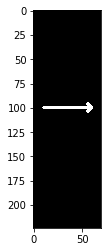

In [28]:

gif_folder = "/home/cindy/Documents/projets/MLPerf/datasets/gif/segmentation"
original_img_folder = "/home/cindy/Documents/projets/MLPerf/datasets/google/google/validation"
concat_img(img_folder=gif_folder, new_img_folder=gif_folder + "_2")

In [30]:

gif_folder = "/home/cindy/Documents/projets/MLPerf/datasets/gif/detection"
original_img_folder = "/home/cindy/Documents/projets/MLPerf/datasets/google/google/validation"
concat_img(img_folder=gif_folder, new_img_folder=gif_folder + "_2")

In [38]:

gif_folder = "/home/cindy/Documents/projets/MLPerf/datasets/gif/classification"
concat_img(img_folder=gif_folder, new_img_folder=gif_folder + "_2")

# Squad

In [36]:
q_img_path = "/home/cindy/Documents/projets/MLPerf/datasets/gif/question.png"
qa_img_path = "/home/cindy/Documents/projets/MLPerf/datasets/gif/ques_ans.png"
delay_img_path = "/home/cindy/Documents/projets/MLPerf/datasets/gif/delay.png"

In [46]:
q_img_path = '/home/cindy/Documents/projets/MLPerf/datasets/gif/bw_question.png'
qa_img_path = '/home/cindy/Documents/projets/MLPerf/datasets/gif/bw_ques_ans.png'
delay_img_path = '/home/cindy/Documents/projets/MLPerf/datasets/gif/bw_delay.png'

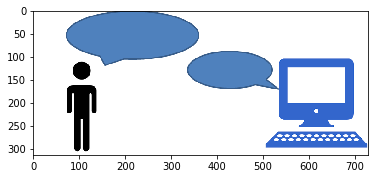

In [5]:
plt.imshow(plt.imread(qa_img_path))

In [44]:
gif_folder = "/home/cindy/Documents/projets/MLPerf/datasets/gif/q_a"
import textwrap

In [42]:
squad_data = squad_json['data']
qa_dict = {}
for i in range(len(squad_data)):
    question = squad_data[i]["paragraphs"][0]['qas'][0]['question']
    if len(squad_data[i]["paragraphs"][0]['qas'][0]['answers'])> 0:
        qa_dict[question] = squad_data[i]["paragraphs"][0]['qas'][0]['answers'][0]['text']
    

In [40]:


def transform_save(orig_img_path,new_img_path):
    q_img = cv2.imread(orig_img_path)
    q_img_2 = q_img.copy()
    N,M,_= q_img.shape

    for i in range(N):
        for j in range(M):
            if np.sum(q_img[i,j,:]) < (255*3-100):
                q_img_2[i,j,:] = 0*np.ones(3,)
            else:
                q_img_2[i,j,:] = 255*np.ones(3,)
    cv2.imwrite(new_img_path, q_img_2)

if 0:
    
    transform_save(q_img_path, '/home/cindy/Documents/projets/MLPerf/datasets/gif/bw_question.png')
    transform_save(qa_img_path, '/home/cindy/Documents/projets/MLPerf/datasets/gif/bw_ques_ans.png')
    transform_save(delay_img_path, '/home/cindy/Documents/projets/MLPerf/datasets/gif/bw_delay.png')




In [58]:
delay_img.shape

(314, 729, 3)

In [60]:
q_img = cv2.imread(q_img_path)
qa_img = cv2.imread(qa_img_path)
delay_img = cv2.imread(delay_img_path)
delay_img = cv2.resize(delay_img, (730,314), interpolation=cv2.INTER_NEAREST)
questions = list(qa_dict.keys())
answers = list(qa_dict.values())
small_size=0.4
big_size=0.5
i = 0
c=0
while c < len(questions):
    question_txt = questions[c]
    q_split = question_txt.split()
    answer_txt = answers[c]
    ans_split = answer_txt.split()
    
    if len(q_split)<10 and len(ans_split) < 8:
        question_txt_1 = " ".join(q_split[:4])
        question_txt_2 = " ".join(q_split[4:])
        # delay img
        cv2.imwrite(os.path.join(gif_folder, f"img{i:03d}.jpg"), delay_img)

        i+= 1
        # question
        #q_img = cv2.imread(q_img_path)
        if len(q_split)>8:
            q_size= small_size
        else:
            q_size = big_size
        cur_q_img = cv2.putText(q_img.copy(), question_txt_1,(100,50), font, q_size, (255,255,255),1)
        cur_q_img = cv2.putText(cur_q_img, question_txt_2,(100,70), font, q_size, (255,255,255),1)
        cur_q_img = cv2.resize(cur_q_img, (730,314), interpolation=cv2.INTER_NEAREST)
        cv2.imwrite(os.path.join(gif_folder, f"img{i:03d}.jpg"), cur_q_img)



        i += 1
        # answer
        
        c+=1

        ans_split = answer_txt.split()
        if len(ans_split) > 3:
            answer_txt =  " ".join(ans_split[:3])
            answer_txt2 =  " ".join(ans_split[3:])
            a_size = small_size
        else:
            a_size = big_size
            
        cur_qa_img = cv2.putText(qa_img.copy(), answer_txt,(360,120), font, a_size, (255,255,255),1)
        if len(ans_split) > 4:
            cur_qa_img = cv2.putText(cur_qa_img, answer_txt2,(360,140), font, a_size, (255,255,255),1)
            
        cur_qa_img = cv2.putText(cur_qa_img, question_txt_1,(100,50), font, q_size, (255,255,255),1)
        
        cur_qa_img = cv2.putText(cur_qa_img, question_txt_2,(100,70), font, q_size, (255,255,255),1)
        cur_qa_img = cv2.resize(cur_qa_img, (730,314), interpolation=cv2.INTER_NEAREST)
        cv2.imwrite(os.path.join(gif_folder, f"img{i:03d}.jpg"), cur_qa_img)
        #print(cur_qa_img.shape)
        i+=1
    else:
        c+=1

(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)
(314, 730, 3)


In [107]:
answers

['France',
 'Computational complexity theory',
 'SoCal',
 'BSkyB',
 'diversified',
 'the southern and central parts of France',
 'solar',
 '8',
 'October 1973',
 'a body of treaties and legislation',
 'also known in English as Amazonia or the Amazon Jungle,',
 'phylum of animals that live in marine waters',
 'Fresno',
 'Paul Baran developed the concept Distributed Adaptive Message Block Switching',
 'the arid plains of Central Asia',
 'melt (magma and/or lava)',
 'its root word pharma',
 'Civil disobedience',
 'Construction',
 'independent',
 'John Harvard',
 'Jacksonville',
 '40%',
 'a private research university',
 'Yuán Cháo',
 'disease',
 'the United Nations',
 'itself',
 'North Sea',
 'Following a referendum in 1997',
 'Islamism',
 'Latin',
 'Warsaw',
 '1754–1763',
 'force']

In [41]:
squad_json = json.load(open('./gif/squad.json','r'))